In [1]:
import seaborn
import numpy as np
import pandas as pd
import ranking as r
import validate_model as vm
import create_model as cm
%matplotlib inline 
%run first_model.py
%load_ext autoreload
%autoreload 2

[INFO] This trial license of GraphLab Create is assigned to lax.cary@gmail.com and will expire on October 09, 2015. Please contact trial@dato.com for licensing options or to request a free non-commercial license for personal or academic use.

[INFO] Start server at: ipc:///tmp/graphlab_server-2037 - Server binary: /home/ubuntu/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1442696274.log
[INFO] GraphLab Server Version: 1.5.2


PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 218083 observations with 29094 users and 64 items.
PROGRESS:     Data prepared in: 0.111194s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 1        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | max_iterations                 | Maximum Number of Iterations            

In [2]:
athlete_ratings, segment_ratings, models = cm.df_to_latent_features(training_df)

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 218083 observations with 29094 users and 64 items.
PROGRESS:     Data prepared in: 0.107927s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 1        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | max_iterations                 | Maximum Number of Iterations            

In [3]:
vm.testing_rmse(models, training_df)

{'downhill': 0.45204345788706946,
 'total': 0.34868714710390181,
 'uphill': 0.22177754506847297}

In [4]:
vm.evaluate_latent_feature_correlations(training_df, segment_ratings)

,total_rating,uphill_rating,downhill_rating
seg_average_grade,0.799133,-0.276475,-0.438347
seg_distance,0.197832,-0.063527,-0.346231
seg_maximum_grade,0.187039,-0.017119,-0.141709
total_rating,1.000000,-0.640527,-0.859844
uphill_rating,-0.640527,1.000000,NaN
downhill_rating,-0.859844,NaN,1.000000


In [13]:
lb = r.Leaderboards(training_df[['athlete_id', 'segment_id', 'seg_average_grade', 'average_speed']])
lb.store('athlete', athlete_ratings)

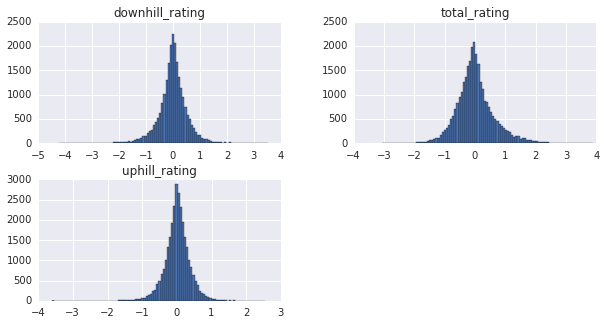

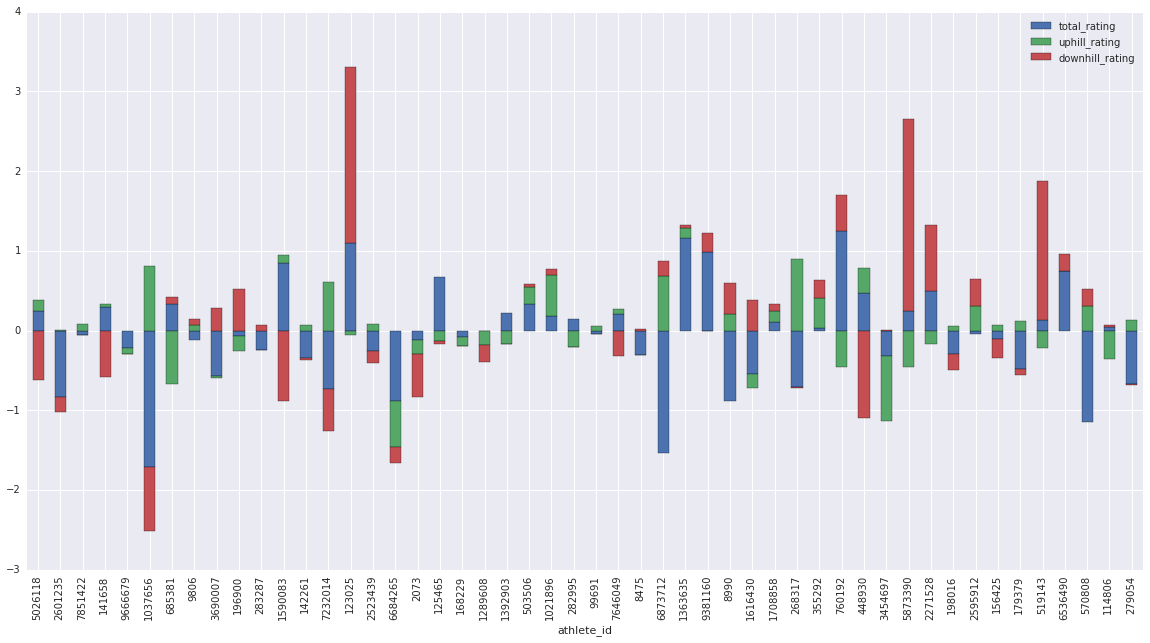

In [6]:
vm.plot_ratings(athlete_ratings)

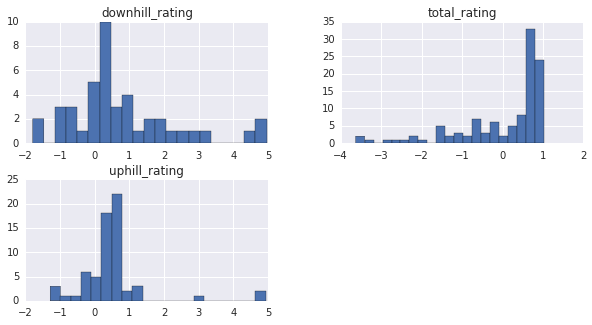

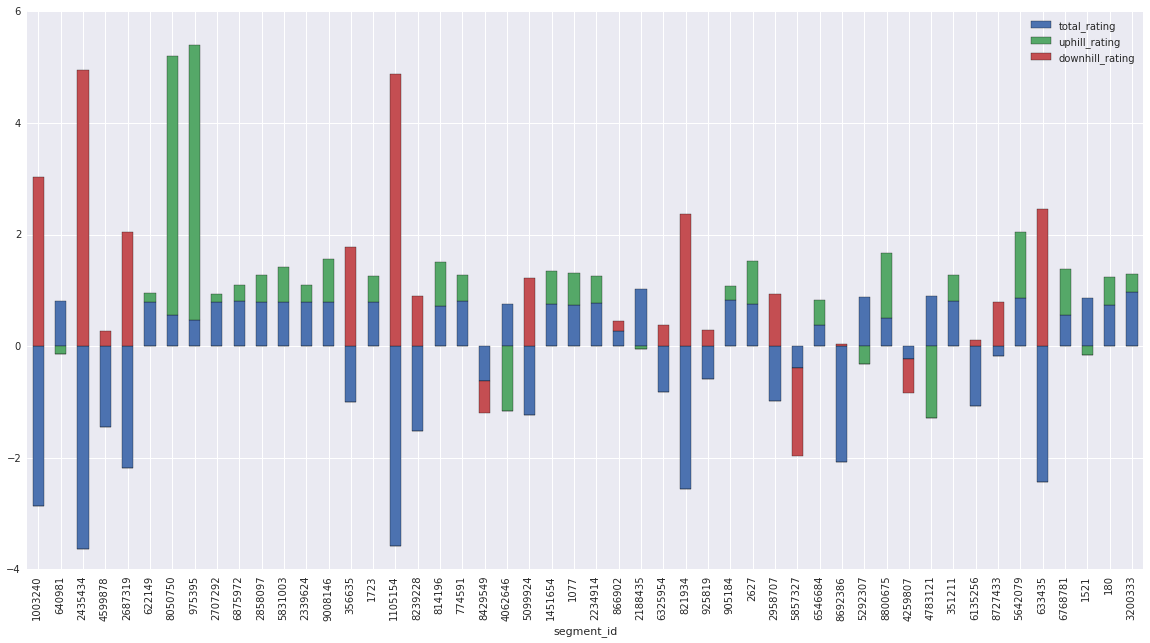

In [7]:
vm.plot_ratings(segment_ratings)

In [8]:
df.query('athlete_id == 336988')

,average_watts,device_watts,distance,elapsed_time,moving_time,athlete_id,segment_id,activity_id,seg_average_grade,seg_distance,seg_elevation_low,seg_elevation_high,seg_maximum_grade,date,tracks_cadence,tracks_heartrate,dist_diff,average_speed
331235,74.8,False,2938.6,234,234,336988,4173351,125476821,-5.6,3074.30,-0.2,172.2,0.0,2014-03-23 13:44:31,False,False,135.70,12.558120
445492,206.8,False,10376.3,2181,1947,336988,622149,125476821,4.0,10131.90,42.4,452.2,166.4,2014-03-23 11:51:14,False,False,-244.40,4.757588
600277,74.2,False,1471.1,89,89,336988,3305098,125476821,-8.7,1454.51,7.5,134.9,0.1,2014-03-23 13:30:38,False,False,-16.59,16.529213
668732,192.5,False,3388.7,1041,807,336988,1173191,125476821,5.4,3422.68,34.1,220.3,39.2,2014-03-23 11:50:53,False,False,33.98,3.255235
993923,262.7,False,2990.6,519,519,336988,6366843,125476821,5.3,2978.50,248.4,407.0,14.2,2014-03-23 12:19:16,False,False,-12.10,5.762235
1247095,244.9,False,3282.0,440,440,336988,6875972,125476821,2.9,3184.60,287.8,382.2,17.0,2014-03-23 12:16:29,False,False,-97.40,7.459091
1301857,257.5,False,2460.9,413,413,336988,5642079,125476821,5.0,2417.70,63.6,185.4,19.1,2014-03-23 13:36:53,False,False,-43.20,5.958596
1652296,195.1,False,1709.1,657,423,336988,640981,125476821,6.1,1668.29,116.9,218.8,11.7,2014-03-23 11:57:21,False,False,-40.81,2.601370
1800731,220.4,False,1074.4,231,231,336988,6048743,125476821,5.4,1079.90,-2.4,57.6,21.5,2014-03-23 13:32:58,False,False,5.50,4.651082
1934424,262.1,False,3078.1,576,576,336988,4793848,125476821,6.0,3078.10,6.2,192.4,16.1,2014-03-23 13:33:26,False,False,0.00,5.343924


In [9]:
df.query('segment_id == 7074191 & average_speed < 2.2')

,average_watts,device_watts,distance,elapsed_time,moving_time,athlete_id,segment_id,activity_id,seg_average_grade,seg_distance,seg_elevation_low,seg_elevation_high,seg_maximum_grade,date,tracks_cadence,tracks_heartrate,dist_diff,average_speed
1361164,92.5,False,195.5,381,51,30309,7074191,1898981,4.7,183.4,201.6,210.2,8.6,2006-04-27 10:08:47,False,False,-12.1,0.513123
1361292,164.5,False,178.7,90,90,10629,7074191,277207,4.7,183.4,201.6,210.2,8.6,2011-01-03 15:34:00,False,False,4.7,1.985556
1361348,97.3,False,186.1,148,70,63598,7074191,3142324,4.7,183.4,201.6,210.2,8.6,2011-03-27 15:32:44,False,False,-2.7,1.257432
1361421,190.0,False,196.0,133,85,99346,7074191,816222,4.7,183.4,201.6,210.2,8.6,2011-06-26 12:21:22,False,False,-12.6,1.473684
1361499,80.7,False,170.0,82,82,842379,7074191,15062285,4.7,183.4,201.6,210.2,8.6,2011-09-04 13:56:54,False,False,13.4,2.073171
1361610,NaN,False,199.1,97,76,761401,7074191,13262558,4.7,183.4,201.6,210.2,8.6,2011-11-12 11:33:20,False,False,-15.7,2.052577
1361653,NaN,False,173.0,209,63,1273184,7074191,26147313,4.7,183.4,201.6,210.2,8.6,2011-12-03 16:04:37,False,False,10.4,0.827751
1361695,NaN,False,196.1,94,42,133299,7074191,2761678,4.7,183.4,201.6,210.2,8.6,2011-12-18 10:15:31,False,False,-12.7,2.086170
1361729,38.3,False,181.7,151,78,181092,7074191,2934475,4.7,183.4,201.6,210.2,8.6,2011-12-28 11:49:25,False,False,1.7,1.203311
1361767,120.0,False,193.8,124,86,9262,7074191,3188361,4.7,183.4,201.6,210.2,8.6,2012-01-07 14:12:32,False,False,-10.4,1.562903


In [10]:
segment_ratings.uphill_rating.idxmax()

975395

In [11]:
df.shape

(1946462, 18)